# GRAFICS COMPARATIUS PER MEMÒRIA

# LLibreries

In [23]:
# 📦 Gestió bàsica de dades i formats
import os
import json
import random
import warnings
from datetime import datetime
from itertools import combinations

# 📊 Tractament i visualització de dades
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter, MaxNLocator
import seaborn as sns
import plotly.express as px

# Configuració visuals
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings("ignore")  # Ignorar warnings per evitar soroll

# Gràfics LSTM

In [24]:
# Carpeta on tens els .csv
carpeta_dades = 'grafics_lstm'

# Llistar arxius .csv
csv_pred_files = [f for f in os.listdir(carpeta_dades) if f.endswith('.csv')]

# Diccionari per guardar els DataFrames
df_preds = {}

# Llegir cada arxiu i guardar-lo amb nom sense extensió
for file_name in csv_pred_files:
    path = os.path.join(carpeta_dades, file_name)
    nom_model = os.path.splitext(file_name)[0]  # sense .csv
    df = pd.read_csv(path)
    df_preds[nom_model] = df

# Exemple: mostrar noms de models carregats
print("Models carregats:", list(df_preds.keys()))

        

Models carregats: ['Exp6_prediccions', 'A2_prediccions', 'C0_prediccions', 'A0_prediccions', 'Exp3_prediccions', 'C2_prediccions']


In [25]:
import os
import pandas as pd

carpeta_dades = 'grafics_lstm'

# Recorre els arxius csv
for arxiu in os.listdir(carpeta_dades):
    if arxiu.endswith('.csv'):
        nom_sense_extensio = os.path.splitext(arxiu)[0]  # p. ex. Exp6_prediccions
        path = os.path.join(carpeta_dades, arxiu)
        
        # Carrega el CSV i assigna'l a una variable amb el mateix nom
        globals()[nom_sense_extensio] = pd.read_csv(path)

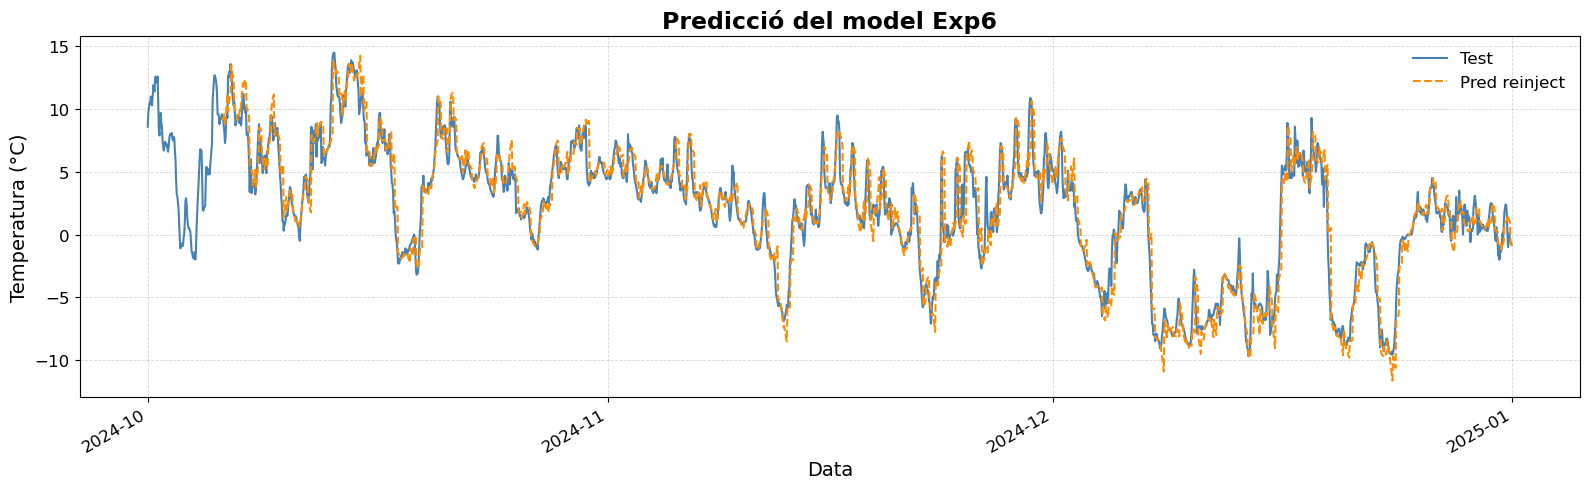

In [26]:
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Crear carpeta si no existeix
os.makedirs("plots_memoria_lstm", exist_ok=True)

# Colors i estil
colors_pred = {
    'pred_batch': 'green',
    'pred_reinject': 'darkorange',
}

linestyle_pred = '--'

# Convertim columna 'data'
Exp6_prediccions['data'] = pd.to_datetime(Exp6_prediccions['data'])

# Crear la figura
fig, ax = plt.subplots(figsize=(16, 5))

# Plot real (test)
ax.plot(Exp6_prediccions['data'], Exp6_prediccions['valor'], label='Test', color='steelblue', linewidth=1.5)

# Prediccions
# for col in ['pred_batch', 'pred_reinject']:
for col in ['pred_reinject']:
    if col in Exp6_prediccions.columns:
        label = col.replace('_', ' ').capitalize()
        ax.plot(
            Exp6_prediccions['data'],
            Exp6_prediccions[col],
            label=label,
            color=colors_pred.get(col, 'gray'),
            linestyle=linestyle_pred,
            linewidth=1.5
        )

# Format eixos i llegenda
ax.set_title("Predicció del model Exp6", fontsize=17, weight='bold')
ax.set_xlabel("Data", fontsize=14)
ax.set_ylabel("Temperatura (°C)", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.5, linewidth=0.6)
ax.legend(fontsize=12, frameon=False)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

fig.autofmt_xdate()
fig.tight_layout()

# Guardar figura
plot_path = os.path.join("plots_memoria_lstm", "Exp6_plot_def.png")
plt.savefig(plot_path, dpi=300)
plt.show()


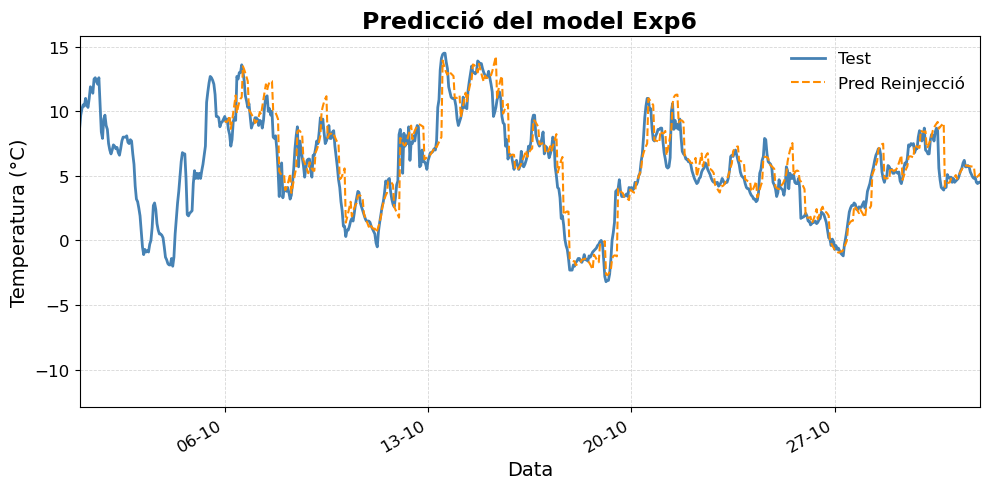

In [27]:
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Crear carpeta de destí si no existeix
os.makedirs("plots_memoria_lstm", exist_ok=True)

# Colors i estil per prediccions
colors_pred = {
    'pred_batch': 'green',
    'pred_reinject': 'darkorange',
}
linestyle_pred = '--'

# Convertir columna 'data' a datetime (si cal)
Exp6_prediccions['data'] = pd.to_datetime(Exp6_prediccions['data'])

# Crear la figura
fig, ax = plt.subplots(figsize=(10, 5))

# Sèrie real (test)
ax.plot(
    Exp6_prediccions['data'],
    Exp6_prediccions['valor'],
    label='Test',
    color='steelblue',
    linewidth=2
)

# Predicció reinjectada
ax.plot(
    Exp6_prediccions['data'],
    Exp6_prediccions['pred_reinject'],
    label='Pred Reinjecció',
    color=colors_pred['pred_reinject'],
    linestyle=linestyle_pred,
    linewidth=1.5
)

# Títol i etiquetes
ax.set_title("Predicció del model Exp6", fontsize=17, weight='bold')
ax.set_xlabel("Data", fontsize=14)
ax.set_ylabel("Temperatura (°C)", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.5, linewidth=0.6)
ax.legend(fontsize=12, frameon=False)

# Limitar l'eix X i posar ticks cada 7 dies començant a 01-10-2024
start_date = pd.Timestamp("2024-10-01")
end_date = pd.Timestamp("2024-11-01")
ax.set_xlim(start_date, end_date)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Format i ajustos
fig.autofmt_xdate()
fig.tight_layout()

# Guardar la figura
plot_path = os.path.join("plots_memoria_lstm", "Exp6_plot_def.png")
plt.savefig(plot_path, dpi=300)
plt.show()


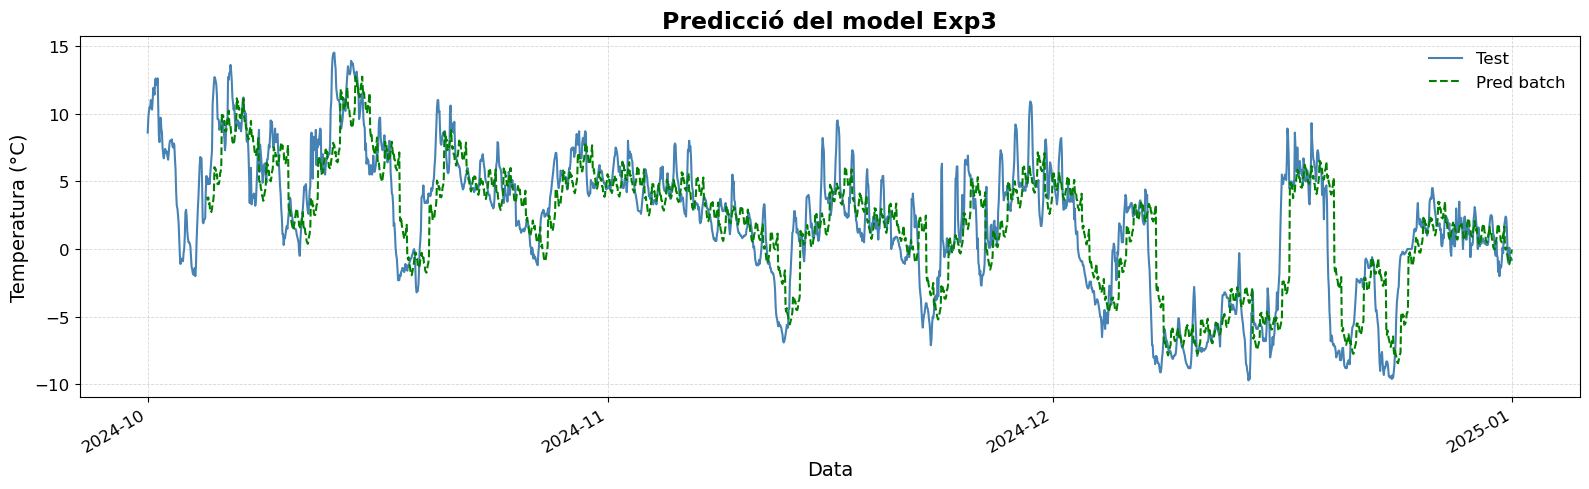

In [28]:
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Crear carpeta si no existeix
os.makedirs("plots_memoria_lstm", exist_ok=True)

# Colors i estil
colors_pred = {
    'pred_batch': 'green',
    'pred_reinject': 'darkorange',
}

linestyle_pred = '--'

# Convertim columna 'data'
Exp3_prediccions['data'] = pd.to_datetime(Exp3_prediccions['data'])

# Crear la figura
fig, ax = plt.subplots(figsize=(16, 5))

# Plot real (test)
ax.plot(Exp3_prediccions['data'], Exp3_prediccions['valor'], label='Test', color='steelblue', linewidth=1.5)

# Prediccions
# for col in ['pred_batch', 'pred_reinject']:
for col in ['pred_batch']:
    if col in Exp3_prediccions.columns:
        label = col.replace('_', ' ').capitalize()
        ax.plot(
            Exp3_prediccions['data'],
            Exp3_prediccions[col],
            label=label,
            color=colors_pred.get(col, 'gray'),
            linestyle=linestyle_pred,
            linewidth=1.5
        )

# Format eixos i llegenda
ax.set_title("Predicció del model Exp3", fontsize=17, weight='bold')
ax.set_xlabel("Data", fontsize=14)
ax.set_ylabel("Temperatura (°C)", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.5, linewidth=0.6)
ax.legend(fontsize=12, frameon=False)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

fig.autofmt_xdate()
fig.tight_layout()

# Guardar figura
plot_path = os.path.join("plots_memoria_lstm", "Exp3_plot_def.png")
plt.savefig(plot_path, dpi=300)
plt.show()


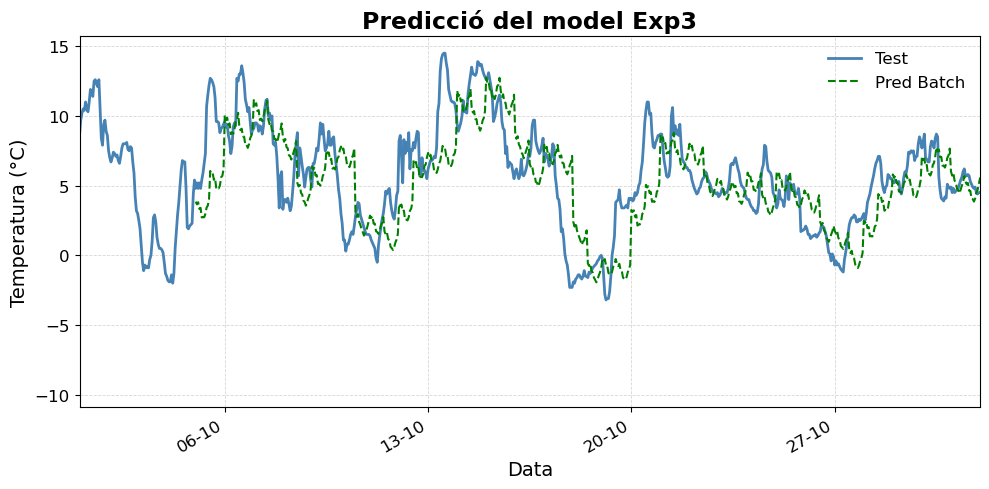

In [29]:
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Crear carpeta si no existeix
os.makedirs("plots_memoria_lstm", exist_ok=True)

# Colors i estil per prediccions
colors_pred = {
    'pred_batch': 'green',
    'pred_reinject': 'darkorange',
}
linestyle_pred = '--'

# Assegurar que la columna 'data' és datetime
Exp3_prediccions['data'] = pd.to_datetime(Exp3_prediccions['data'])

# Crear la figura
fig, ax = plt.subplots(figsize=(10, 5))

# Dades reals (test)
ax.plot(
    Exp3_prediccions['data'],
    Exp3_prediccions['valor'],
    label='Test',
    color='steelblue',
    linewidth=2
)

# Predicció (només pred_batch)
ax.plot(
    Exp3_prediccions['data'],
    Exp3_prediccions['pred_batch'],
    label='Pred Batch',
    color=colors_pred['pred_batch'],
    linestyle=linestyle_pred,
    linewidth=1.5
)

# Títol i llegenda
ax.set_title("Predicció del model Exp3", fontsize=17, weight='bold')
ax.set_xlabel("Data", fontsize=14)
ax.set_ylabel("Temperatura (°C)", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.5, linewidth=0.6)
ax.legend(fontsize=12, frameon=False)

# Limitar eix X
ax.set_xlim(pd.Timestamp("2024-10-01"), pd.Timestamp("2024-11-01"))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))  # Cada 7 dies

# Format i guardar
fig.autofmt_xdate()
fig.tight_layout()
plot_path = os.path.join("plots_memoria_lstm", "Exp3_plot_def.png")
plt.savefig(plot_path, dpi=300)
plt.show()


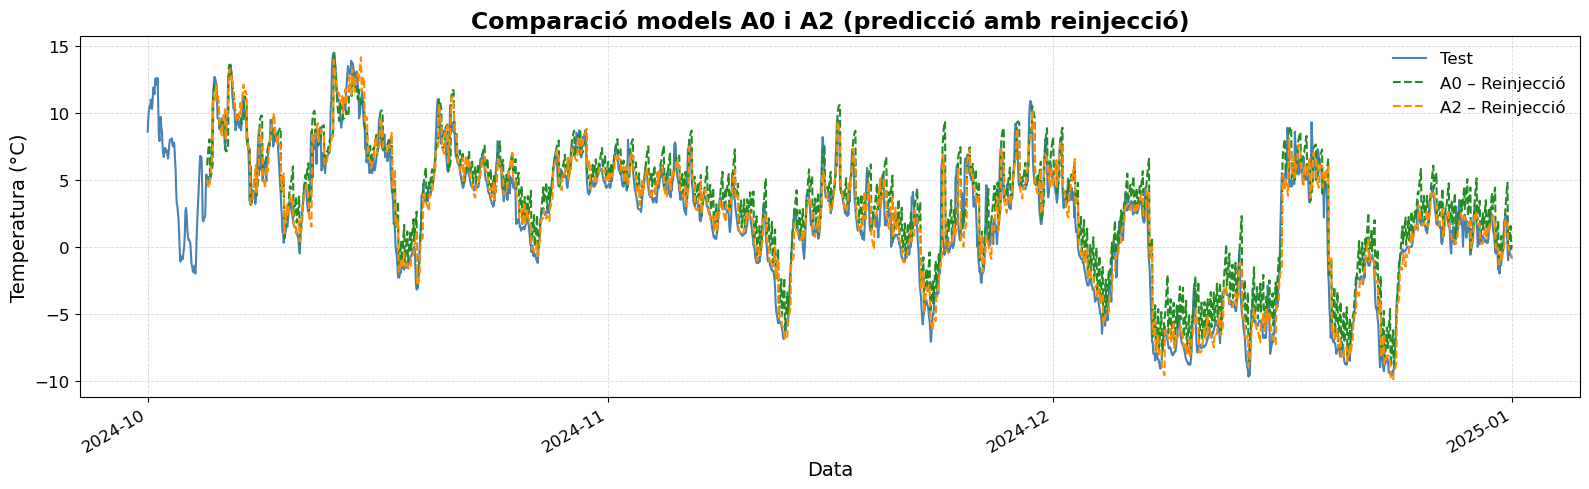

In [30]:
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Crear carpeta si no existeix
os.makedirs("plots_memoria_lstm", exist_ok=True)

# Colors per cada model
colors_model = {
    'A0': 'forestgreen',
    'A2': 'darkorange',
}

# Linia discontínua
linestyle_pred = '--'

# Assegurar que la columna 'data' és datetime
A0_prediccions['data'] = pd.to_datetime(A0_prediccions['data'])
A2_prediccions['data'] = pd.to_datetime(A2_prediccions['data'])

# Crear figura
fig, ax = plt.subplots(figsize=(16, 5))

# Dades reals (de qualsevol dels dos, són les mateixes)
ax.plot(A0_prediccions['data'], A0_prediccions['valor'], label='Test', color='steelblue', linewidth=1.5)

# Plot A0
ax.plot(
    A0_prediccions['data'],
    A0_prediccions['pred_reinject'],
    label='A0 – Reinjecció',
    color=colors_model['A0'],
    linestyle=linestyle_pred,
    linewidth=1.5
)

# Plot A2
ax.plot(
    A2_prediccions['data'],
    A2_prediccions['pred_reinject'],
    label='A2 – Reinjecció',
    color=colors_model['A2'],
    linestyle=linestyle_pred,
    linewidth=1.5
)

# Format eixos i llegenda
ax.set_title("Comparació models A0 i A2 (predicció amb reinjecció)", fontsize=17, weight='bold')
ax.set_xlabel("Data", fontsize=14)
ax.set_ylabel("Temperatura (°C)", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.5, linewidth=0.6)
ax.legend(fontsize=12, frameon=False)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

fig.autofmt_xdate()
fig.tight_layout()

# Guardar figura
plot_path = os.path.join("plots_memoria_lstm", "A0_A2_plot_def.png")
plt.savefig(plot_path, dpi=300)
plt.show()


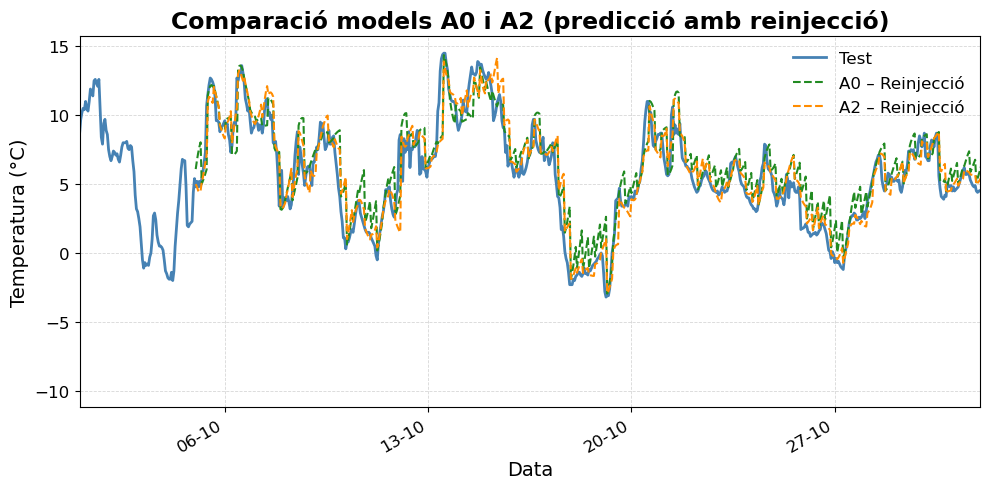

In [31]:
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Crear carpeta si no existeix
os.makedirs("plots_memoria_lstm", exist_ok=True)

# Colors per cada model
colors_model = {
    'A0': 'forestgreen',
    'A2': 'darkorange',
}

linestyle_pred = '--'

# Convertir 'data' a datetime
A0_prediccions['data'] = pd.to_datetime(A0_prediccions['data'])
A2_prediccions['data'] = pd.to_datetime(A2_prediccions['data'])

# Crear figura
fig, ax = plt.subplots(figsize=(10, 5))

# Sèrie real (test)
ax.plot(
    A0_prediccions['data'],
    A0_prediccions['valor'],
    label='Test',
    color='steelblue',
    linewidth=2
)

# Reinjecció A0
ax.plot(
    A0_prediccions['data'],
    A0_prediccions['pred_reinject'],
    label='A0 – Reinjecció',
    color=colors_model['A0'],
    linestyle=linestyle_pred,
    linewidth=1.5
)

# Reinjecció A2
ax.plot(
    A2_prediccions['data'],
    A2_prediccions['pred_reinject'],
    label='A2 – Reinjecció',
    color=colors_model['A2'],
    linestyle=linestyle_pred,
    linewidth=1.5
)

# Títol i eixos
ax.set_title("Comparació models A0 i A2 (predicció amb reinjecció)", fontsize=17, weight='bold')
ax.set_xlabel("Data", fontsize=14)
ax.set_ylabel("Temperatura (°C)", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.5, linewidth=0.6)
ax.legend(fontsize=12, frameon=False)

# Limitar a octubre 2024
ax.set_xlim(pd.Timestamp("2024-10-01"), pd.Timestamp("2024-11-01"))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))

fig.autofmt_xdate()
fig.tight_layout()

# Guardar la figura
plot_path = os.path.join("plots_memoria_lstm", "A0_A2_plot_def.png")
plt.savefig(plot_path, dpi=300)
plt.show()


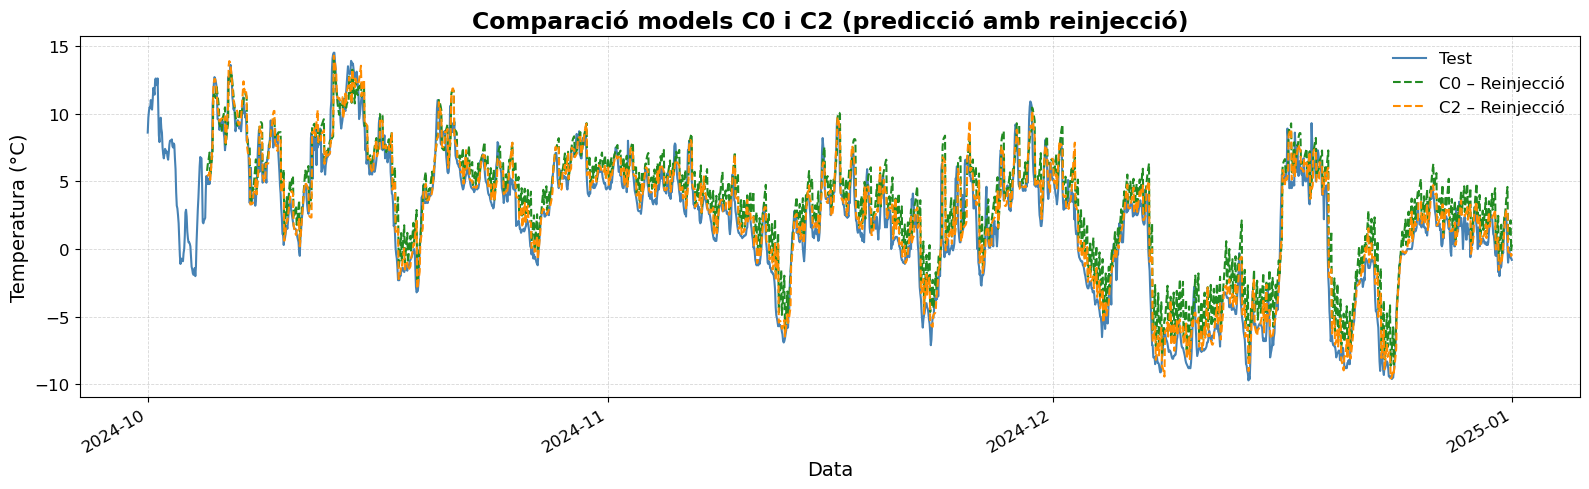

In [32]:
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Crear carpeta si no existeix
os.makedirs("plots_memoria_lstm", exist_ok=True)

# Colors per cada model
colors_model = {
    'C0': 'forestgreen',
    'C2': 'darkorange',
}

# Linia discontínua
linestyle_pred = '--'

# Assegurar que la columna 'data' és datetime
C0_prediccions['data'] = pd.to_datetime(C0_prediccions['data'])
C2_prediccions['data'] = pd.to_datetime(C2_prediccions['data'])

# Crear figura
fig, ax = plt.subplots(figsize=(16, 5))

# Dades reals (de qualsevol dels dos, són les mateixes)
ax.plot(C0_prediccions['data'], C0_prediccions['valor'], label='Test', color='steelblue', linewidth=1.5)

# Plot A0
ax.plot(
    C0_prediccions['data'],
    C0_prediccions['pred_reinject'],
    label='C0 – Reinjecció',
    color=colors_model['C0'],
    linestyle=linestyle_pred,
    linewidth=1.5
)

# Plot A2
ax.plot(
    C2_prediccions['data'],
    C2_prediccions['pred_reinject'],
    label='C2 – Reinjecció',
    color=colors_model['C2'],
    linestyle=linestyle_pred,
    linewidth=1.5
)

# Format eixos i llegenda
ax.set_title("Comparació models C0 i C2 (predicció amb reinjecció)", fontsize=17, weight='bold')
ax.set_xlabel("Data", fontsize=14)
ax.set_ylabel("Temperatura (°C)", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.5, linewidth=0.6)
ax.legend(fontsize=12, frameon=False)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

fig.autofmt_xdate()
fig.tight_layout()

# Guardar figura
plot_path = os.path.join("plots_memoria_lstm", "C0_C2_plot_def.png")
plt.savefig(plot_path, dpi=300)
plt.show()


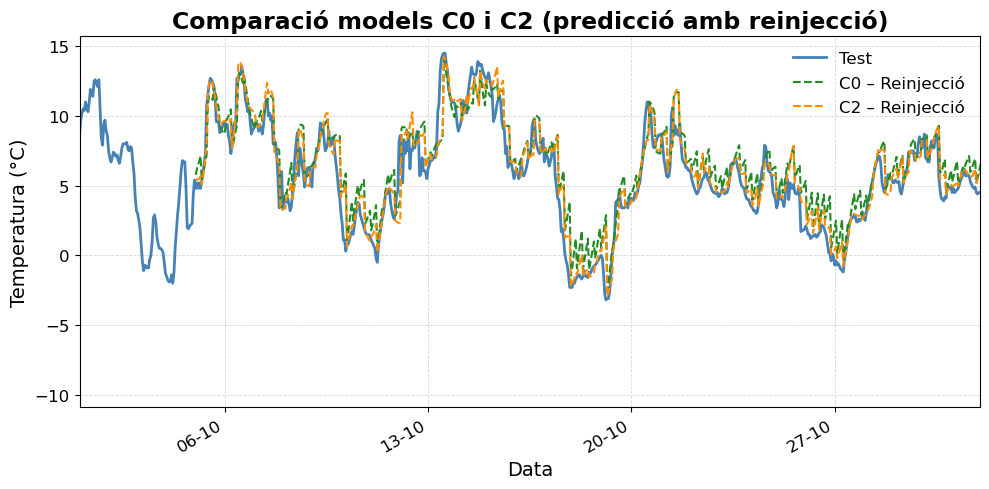

In [33]:
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Crear carpeta si no existeix
os.makedirs("plots_memoria_lstm", exist_ok=True)

# Colors per cada model
colors_model = {
    'C0': 'forestgreen',
    'C2': 'darkorange',
}

# Estil de línia
linestyle_pred = '--'

# Convertir columna 'data' a datetime
C0_prediccions['data'] = pd.to_datetime(C0_prediccions['data'])
C2_prediccions['data'] = pd.to_datetime(C2_prediccions['data'])

# Crear figura
fig, ax = plt.subplots(figsize=(10, 5))

# Sèrie real (test)
ax.plot(
    C0_prediccions['data'],
    C0_prediccions['valor'],
    label='Test',
    color='steelblue',
    linewidth=2
)

# Predicció reinjecció C0
ax.plot(
    C0_prediccions['data'],
    C0_prediccions['pred_reinject'],
    label='C0 – Reinjecció',
    color=colors_model['C0'],
    linestyle=linestyle_pred,
    linewidth=1.5
)

# Predicció reinjecció C2
ax.plot(
    C2_prediccions['data'],
    C2_prediccions['pred_reinject'],
    label='C2 – Reinjecció',
    color=colors_model['C2'],
    linestyle=linestyle_pred,
    linewidth=1.5
)

# Format general
ax.set_title("Comparació models C0 i C2 (predicció amb reinjecció)", fontsize=17, weight='bold')
ax.set_xlabel("Data", fontsize=14)
ax.set_ylabel("Temperatura (°C)", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.5, linewidth=0.6)
ax.legend(fontsize=12, frameon=False)

# Limitar a 1 mes concret (octubre 2024)
ax.set_xlim(pd.Timestamp("2024-10-01"), pd.Timestamp("2024-11-01"))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))

fig.autofmt_xdate()
fig.tight_layout()

# Guardar figura
plot_path = os.path.join("plots_memoria_lstm", "C0_C2_plot_def.png")
plt.savefig(plot_path, dpi=300)
plt.show()


# Grafics ARIMA

In [35]:
# Carpeta on tens els .csv
carpeta_dades = 'grafics_arima'

# Llistar arxius .csv
csv_pred_files = [f for f in os.listdir(carpeta_dades) if f.endswith('.csv')]

# Diccionari per guardar els DataFrames
df_preds = {}

# Llegir cada arxiu i guardar-lo amb nom sense extensió
for file_name in csv_pred_files:
    path = os.path.join(carpeta_dades, file_name)
    nom_model = os.path.splitext(file_name)[0]  # sense .csv
    df = pd.read_csv(path)
    df_preds[nom_model] = df

# Exemple: mostrar noms de models carregats
print("Models carregats:", list(df_preds.keys()))

        

Models carregats: []


In [36]:
import os
import pandas as pd

carpeta_dades = 'grafics_lstm'

# Recorre els arxius csv
for arxiu in os.listdir(carpeta_dades):
    if arxiu.endswith('.csv'):
        nom_sense_extensio = os.path.splitext(arxiu)[0]  # p. ex. Exp6_prediccions
        path = os.path.join(carpeta_dades, arxiu)
        
        # Carrega el CSV i assigna'l a una variable amb el mateix nom
        globals()[nom_sense_extensio] = pd.read_csv(path)

## Comparacio ARIMA i LSTM

In [37]:
# Obrim carpeta millors_models_arima_lstm
carpeta_models = 'millors_models_arima_lstm'

# Mirem els arxius .csv
csv_pred_files = [f for f in os.listdir(carpeta_models) if f.endswith('.csv')]

print("Arxius carregats:", csv_pred_files)

Arxius carregats: ['C1_arima_prediccions.csv', 'Exp6_lstm_prediccions.csv']


In [38]:
# Obrim els csv i els guardem en df amb el mateix nom que l'arxiu
for file_name in csv_pred_files:
    path = os.path.join(carpeta_models, file_name)
    nom_model = os.path.splitext(file_name)[0]  # sense .csv
    df = pd.read_csv(path)
    globals()[nom_model] = df  # assignem el DataFrame a una variable amb el nom del model

In [39]:
C1_arima_prediccions

,data,valor,forecast
0,2024-10-01 00:00:00+00:00,8.60,8.33
1,2024-10-01 01:00:00+00:00,9.70,8.16
2,2024-10-01 02:00:00+00:00,10.20,8.19
3,2024-10-01 03:00:00+00:00,10.50,8.10
4,2024-10-01 04:00:00+00:00,10.40,7.98
...,...,...,...
740,2024-10-31 20:00:00+00:00,4.90,4.63
741,2024-10-31 21:00:00+00:00,4.50,4.59
742,2024-10-31 22:00:00+00:00,4.40,4.52
743,2024-10-31 23:00:00+00:00,4.50,4.46


In [40]:
Exp6_lstm_prediccions

,data,valor,valor_scaled,pred_batch,pred_reinject
0,2024-10-01 00:00:00+00:00,8.60,0.62,NaN,NaN
1,2024-10-01 01:00:00+00:00,9.70,0.64,NaN,NaN
2,2024-10-01 02:00:00+00:00,10.20,0.66,NaN,NaN
3,2024-10-01 03:00:00+00:00,10.50,0.66,NaN,NaN
4,2024-10-01 04:00:00+00:00,10.40,0.66,NaN,NaN
...,...,...,...,...,...
2203,2024-12-31 19:00:00+00:00,0.10,0.42,-0.74,1.12
2204,2024-12-31 20:00:00+00:00,-0.60,0.40,-0.05,0.96
2205,2024-12-31 21:00:00+00:00,-0.60,0.40,-0.59,-0.59
2206,2024-12-31 22:00:00+00:00,-0.70,0.40,-0.81,-0.80


In [44]:
# Primer fem un merge pels timestamps comuns
comp_arima_lstm = pd.merge(
    C1_arima_prediccions[['data', 'valor', 'forecast']],  # Seleccionem només les columnes que ens interessen
    Exp6_lstm_prediccions[['data', 'valor', 'pred_reinject']],  # També aquí
    on='data',
    how='inner'  # Ens quedem només amb els timestamps comuns
)

# Ens assegurem que la columna valor sigui només una (si és igual a les dues fonts)
# Si són iguals, podem deixar només una i eliminar duplicats
comp_arima_lstm = comp_arima_lstm.drop(columns=['valor_y']).rename(columns={
    'valor_x': 'valor',
    'forecast': 'pred_arima',
    'pred_reinject': 'pred_lstm'
})

comp_arima_lstm

,data,valor,pred_arima,pred_lstm
0,2024-10-01 00:00:00+00:00,8.60,8.33,NaN
1,2024-10-01 01:00:00+00:00,9.70,8.16,NaN
2,2024-10-01 02:00:00+00:00,10.20,8.19,NaN
3,2024-10-01 03:00:00+00:00,10.50,8.10,NaN
4,2024-10-01 04:00:00+00:00,10.40,7.98,NaN
...,...,...,...,...
740,2024-10-31 20:00:00+00:00,4.90,4.63,4.83
741,2024-10-31 21:00:00+00:00,4.50,4.59,4.88
742,2024-10-31 22:00:00+00:00,4.40,4.52,4.95
743,2024-10-31 23:00:00+00:00,4.50,4.46,5.05


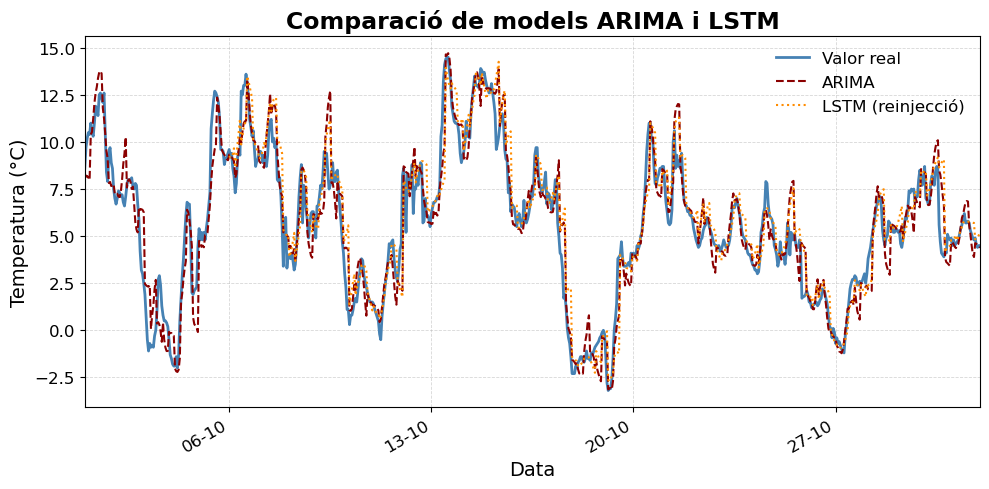

In [46]:
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Crear carpeta de destí si no existeix
os.makedirs("millors_models_arima_lstm", exist_ok=True)

# Convertir columna 'data' a datetime si cal
comp_arima_lstm['data'] = pd.to_datetime(comp_arima_lstm['data'])

# Crear la figura
fig, ax = plt.subplots(figsize=(10, 5))

# Sèrie real
ax.plot(
    comp_arima_lstm['data'],
    comp_arima_lstm['valor'],
    label='Valor real',
    color='steelblue',
    linewidth=2
)

# Predicció ARIMA
ax.plot(
    comp_arima_lstm['data'],
    comp_arima_lstm['pred_arima'],
    label='ARIMA',
    color='darkred',
    linestyle='--',
    linewidth=1.5
)

# Predicció LSTM (reinjecció)
ax.plot(
    comp_arima_lstm['data'],
    comp_arima_lstm['pred_lstm'],
    label='LSTM (reinjecció)',
    color='darkorange',
    linestyle=':',
    linewidth=1.5
)

# Títol i etiquetes
ax.set_title("Comparació de models ARIMA i LSTM", fontsize=17, weight='bold')
ax.set_xlabel("Data", fontsize=14)
ax.set_ylabel("Temperatura (°C)", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.5, linewidth=0.6)
ax.legend(fontsize=12, frameon=False)

# Limitar l’eix X a l'interval comú
start_date = pd.Timestamp("2024-10-01")
end_date = pd.Timestamp("2024-11-01")
ax.set_xlim(start_date, end_date)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Format i ajustos
fig.autofmt_xdate()
fig.tight_layout()

# Guardar la figura
plot_path = os.path.join("millors_models_arima_lstm", "comparacio_arima_lstm.png")
# plt.savefig(plot_path, dpi=300)
plt.show()


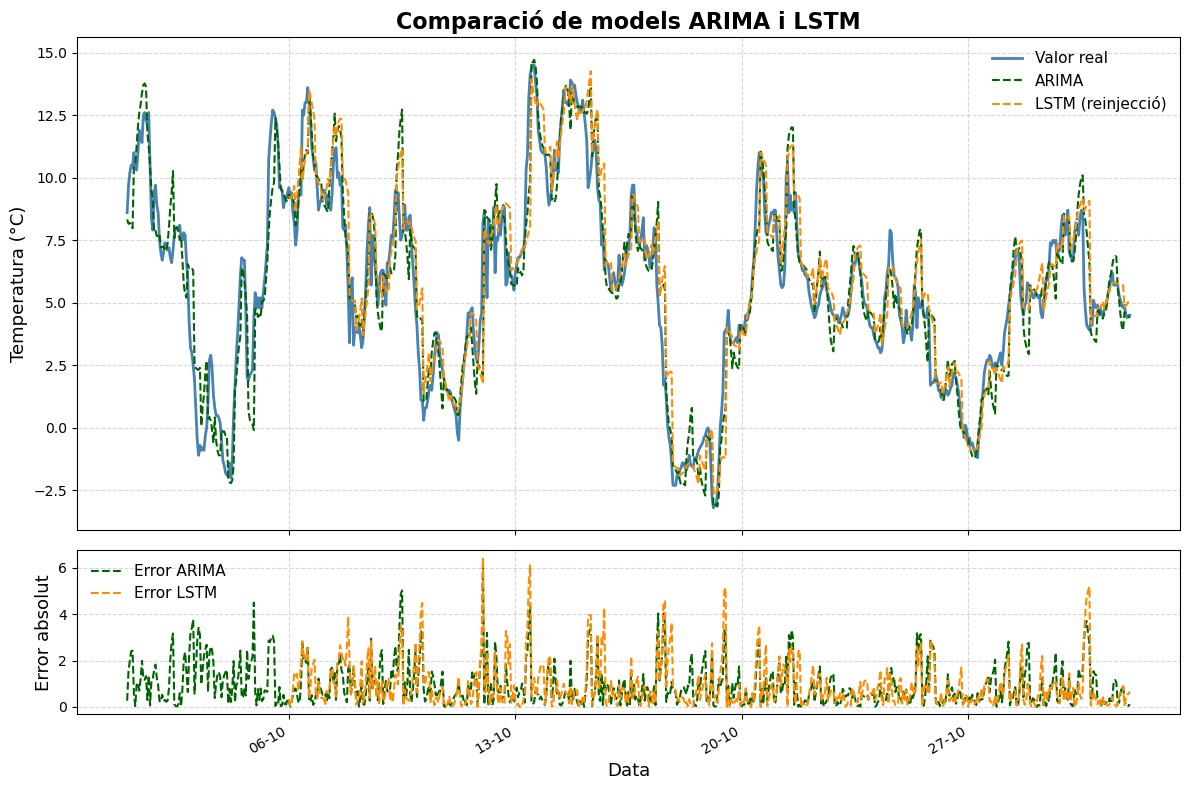

In [52]:
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Crear carpeta per desar el gràfic
os.makedirs("millors_models_arima_lstm", exist_ok=True)

# Ens assegurem que la columna 'data' sigui datetime
comp_arima_lstm['data'] = pd.to_datetime(comp_arima_lstm['data'])

# Crear subplots
fig, axs = plt.subplots(
    2, 1, figsize=(12, 8), sharex=True,
    gridspec_kw={'height_ratios': [3, 1]}
)

# --- PART SUPERIOR: Valors reals i prediccions ---
axs[0].plot(comp_arima_lstm['data'], comp_arima_lstm['valor'], label='Valor real', color='steelblue', linewidth=2)
axs[0].plot(comp_arima_lstm['data'], comp_arima_lstm['pred_arima'], label='ARIMA', color='darkgreen', linestyle='--', linewidth=1.5)
axs[0].plot(comp_arima_lstm['data'], comp_arima_lstm['pred_lstm'], label='LSTM (reinjecció)', color='darkorange', linestyle='--', linewidth=1.5)

axs[0].set_ylabel("Temperatura (°C)", fontsize=13)
axs[0].set_title("Comparació de models ARIMA i LSTM", fontsize=16, weight='bold')
axs[0].legend(fontsize=11, frameon=False)
axs[0].grid(True, linestyle='--', alpha=0.5)

# --- PART INFERIOR: Error absolut ---
axs[1].plot(comp_arima_lstm['data'], abs(comp_arima_lstm['valor'] - comp_arima_lstm['pred_arima']), label='Error ARIMA', color='darkgreen', linestyle='--')
axs[1].plot(comp_arima_lstm['data'], abs(comp_arima_lstm['valor'] - comp_arima_lstm['pred_lstm']), label='Error LSTM', color='darkorange', linestyle='--')

axs[1].set_ylabel("Error absolut", fontsize=13)
axs[1].set_xlabel("Data", fontsize=13)
axs[1].legend(fontsize=11, frameon=False)
axs[1].grid(True, linestyle='--', alpha=0.5)

# Format eix X
axs[1].xaxis.set_major_locator(mdates.DayLocator(interval=7))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
fig.autofmt_xdate()

# Ajustos finals i guardar
fig.tight_layout()
fig.savefig("millors_models_arima_lstm/comparacio_models_amb_errors.png", dpi=300)
plt.show()
